In [0]:
import numpy as np
import pandas as pd

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


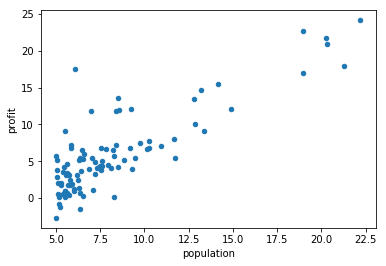

In [6]:
#Load the csv file and take a quick look at it
data = pd.read_csv('ex1data1.csv')
print(data.head(5))
data.plot.scatter('population', 'profit')

In [0]:
#Preparing the data for the machine learning x for the input and y for the output
x = np.array(data['population'])
y = np.array(data['profit'])
#initialize the thetas to 0
theta = np.array([0.0, 0.0])

In [0]:
#Define a method that returns the output following the formula ax+b where a and b are the thetas
def predict(X, theta):
    return theta[1] * X + theta[0]

In [10]:
#Method for the gradient descent to actualize the thetas
def fit(X, y, theta, alpha, num_iters):
    """
    alpha = learning rate
    num_iters = number of iterations over the gradient
    """

    m = 1 / len(y)
    for i in range(num_iters):
        old_theta = theta
        theta[0] = old_theta[0] - alpha * m * sum((predict(X, old_theta) - y))
        theta[1] = old_theta[1] - alpha * m * sum(((predict(X, old_theta) - y)) * X)
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    return theta
#Testing with alpha = 0.003 and num_iters = 5 gives the following thetas
fit(x, y, theta, 0.003, 5)

array([0.0497086 , 0.60155416])

In [0]:
#Method to visualize the linear regression
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(x, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

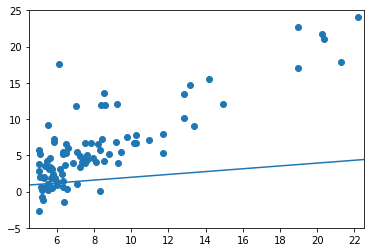

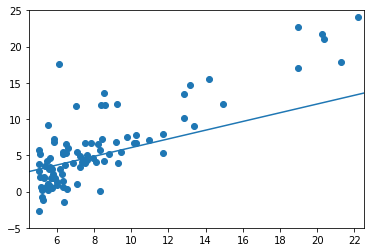

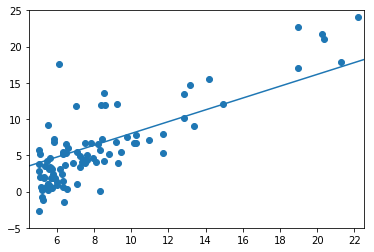

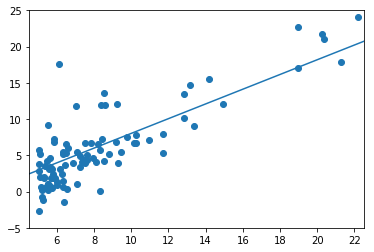

In [13]:
#Now we will test the gradient descent on different number of iterations and call visualize to see it
for num_iter in [1, 5, 100, 1500]:
  #don't forget to reset the thetas before each call to fit)
  theta = np.array([0.0, 0.0])
  visualize(fit(x, y, theta, 0.003, num_iter))

# Impressive. It looks like the more iterations you do the more the machine learning will output a much better regression. Which is the desired behaviour from what I've learned about the gradient descent

In [0]:
#Let's define a cost function
def cost(X, y, theta):
  return sum(np.power(predict(x, theta) - y, 2)) / (2 * len(x))

In [15]:
#The purpose of the gradient is to reduce the cost function by updating the thetas to do so
#Let's see how much is our cost function by initializing the thetas to 0
theta = np.array([0.0, 0.0])
cost(x, y, theta)

32.072733877455654

In [0]:
#Define a new gradient descend with the history of the cost functions at each update
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = 1 / len(y)
    J_history = []
    J_history.append(cost(x, y, theta))
    for i in range(num_iters):
        old_theta = theta
        theta[0] = old_theta[0] - alpha * m * sum((predict(X, old_theta) - y))
        theta[1] = old_theta[1] - alpha * m * sum(((predict(X, old_theta) - y)) * X)
        J_history.append(cost(x, y, theta))
    return theta, J_history

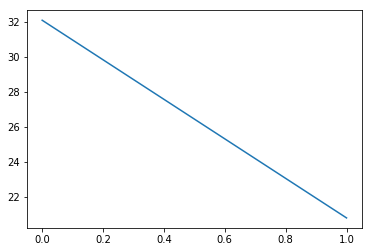

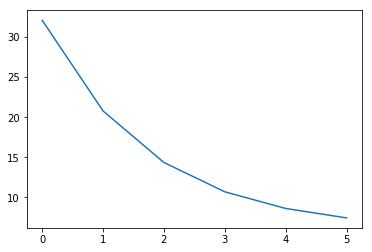

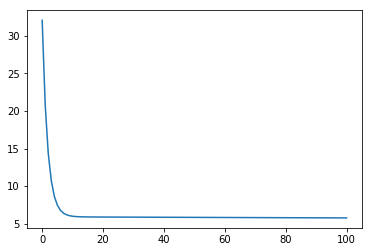

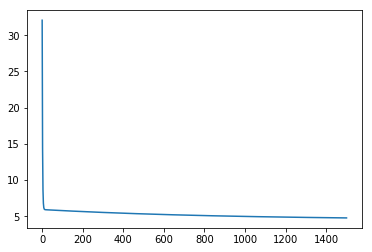

In [18]:
#Start the training with that new method and plot the cost function over the iterations
for nb in [1, 5, 100, 1500]:
  theta = np.zeros(2)
  theta, J_history = fit_with_cost(x, y, theta, 0.003, nb)
  fit = plt.figure()
  ax = plt.axes()
  ax.plot(J_history)